# Market Context Feature Engeneering and Feature Scaling

In [208]:
# Questions:
# ---------
# What would happen if no scaling is applied?
# min-max vs, z-score?
# Does z-score work if value is outside historic range?
# [0,1] vs [-1,1] ranges
# current, vs historic min and max values
# Scale (relative) spread

**Notes** <p>

- Scaling is necessary since without scaling features with larger absolute values will dominate the model (i.e. prices would typically range between 10 and 300 while quantities can easily reach hundrets of thousands)
- Moreover, scaling can help co speed up convergence

**Difficulties of Scaling**  <p>
    
- What are proper scaling methods?
- Which information gets lost during scaling (e.g. absolute prices, absolute volumes)
- How can the model translate back to the original scale? E.g. a price prediction is made based on scaled data and now an order should be placed with the respective absolute unscaled price... -> This could probably work with fix scaling parameters (e.g. min and max are computed as long run averages and stay fix)
- Toy Approach: Use min max scaling with the current minn and max values of the orderbook (for prices and quantities seperately): Disadvantage: Since the scaling parameters change all the time, the scaled orderbooks are not really comparable over time, however, some information is still maintained (e.g. the differecne between the levels, difference between the bid and the ask side etc.). Moreover, when market context stores e.g. ten ticks, the stored data will change when the min and max values change... (in cas the min and max are computed for the entire context and not for each row seperately). Advantage: data can never be outside the min-max range.
- **First Approach**: Use min-max scaling with long run min and max values computed for prices and quantities (e.g. average or even absolute min/max during the last day/week/month). Problem: It is possible that new data is outside the historic min-max range.

**Relevant Features**
- Which additional Features should be used?
- How should these additional features be scaled?
- An Easy Example would be to take the midprice and scale it in the same way as other prices
- (Relative) Spread
- Bid-Ask-Imbalances

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
df = pd.read_csv("market_context_experimental_df.csv")

In [211]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,291.2,629.0,291.4,17.0,291.1,598.0,291.5,547.0,291.0,1310.0,...,292.1,664.0,290.4,169.0,292.2,762.0,290.3,209.0,292.3,1587.0
1,291.2,629.0,291.4,17.0,291.1,598.0,291.5,547.0,291.0,1310.0,...,292.1,664.0,290.4,169.0,292.2,762.0,290.3,209.0,292.3,1587.0
2,291.2,629.0,291.4,17.0,291.1,566.0,291.5,547.0,291.0,1310.0,...,292.1,664.0,290.4,169.0,292.2,762.0,290.3,209.0,292.3,1587.0
3,291.3,40.0,291.4,17.0,291.2,629.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
4,291.3,40.0,291.4,17.0,291.2,629.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
5,291.3,40.0,291.4,17.0,291.2,659.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
6,291.3,85.0,291.4,17.0,291.2,659.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
7,291.3,85.0,291.4,17.0,291.2,659.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
8,291.3,120.0,291.4,17.0,291.2,659.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0
9,291.3,120.0,291.4,17.0,291.2,520.0,291.5,547.0,291.1,566.0,...,292.1,664.0,290.5,906.0,292.2,762.0,290.4,169.0,292.3,1587.0


In [212]:
array = np.array(df)

In [213]:
array[0,:]

array([ 291.2,  629. ,  291.4,   17. ,  291.1,  598. ,  291.5,  547. ,
        291. , 1310. ,  291.6,  561. ,  290.9,  453. ,  291.7,  549. ,
        290.8,  680. ,  291.8,  451. ,  290.7,  795. ,  291.9,  540. ,
        290.6,  473. ,  292. ,  339. ,  290.5,  906. ,  292.1,  664. ,
        290.4,  169. ,  292.2,  762. ,  290.3,  209. ,  292.3, 1587. ])

### Midprice, Spread

In [214]:
# Does the midprice itself carry any information?

In [215]:
midprice = (array[:,2] + array[:,0]) / 2
midprice

array([291.3 , 291.3 , 291.3 , 291.35, 291.35, 291.35, 291.35, 291.35,
       291.35, 291.35])

In [216]:
spread = array[:,2] - array[:,0]
spread

array([0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [217]:
# Problem: 
# relative spread has to be scaled...
# Collect historic min and max spread over a certain period?

In [218]:
# Problem: gas to be scaled...
relative_spread = spread / midprice
relative_spread

array([0.00068658, 0.00068658, 0.00068658, 0.00034323, 0.00034323,
       0.00034323, 0.00034323, 0.00034323, 0.00034323, 0.00034323])

In [219]:
relative_spread = 5 / 30

In [220]:
relative_spread*1000

166.66666666666666

### Scaling

In [221]:
scaled_array = array.copy()

### Prices: Min-Max-Scaling (of current market_context)

In [224]:
scaled_array.astype('float32')

array([[ 291.2,  629. ,  291.4,   17. ,  291.1,  598. ,  291.5,  547. ,
         291. , 1310. ,  291.6,  561. ,  290.9,  453. ,  291.7,  549. ,
         290.8,  680. ,  291.8,  451. ,  290.7,  795. ,  291.9,  540. ,
         290.6,  473. ,  292. ,  339. ,  290.5,  906. ,  292.1,  664. ,
         290.4,  169. ,  292.2,  762. ,  290.3,  209. ,  292.3, 1587. ],
       [ 291.2,  629. ,  291.4,   17. ,  291.1,  598. ,  291.5,  547. ,
         291. , 1310. ,  291.6,  561. ,  290.9,  453. ,  291.7,  549. ,
         290.8,  680. ,  291.8,  451. ,  290.7,  795. ,  291.9,  540. ,
         290.6,  473. ,  292. ,  339. ,  290.5,  906. ,  292.1,  664. ,
         290.4,  169. ,  292.2,  762. ,  290.3,  209. ,  292.3, 1587. ],
       [ 291.2,  629. ,  291.4,   17. ,  291.1,  566. ,  291.5,  547. ,
         291. , 1310. ,  291.6,  561. ,  290.9,  453. ,  291.7,  549. ,
         290.8,  680. ,  291.8,  451. ,  290.7,  795. ,  291.9,  540. ,
         290.6,  473. ,  292. ,  339. ,  290.5,  906. ,  292.1

In [225]:
scaled_array.dtype

dtype('float64')

 X_norm = (X - X_min) / (X_max-X_min)

In [40]:
min_price = scaled_array[:,::2].min()
min_price

290.3

In [41]:
max_price = scaled_array[:,::2].max()
max_price

292.3

In [ ]:
# What happens if the price is above max?
# --> scaled price > 1

In [83]:
(295 - min_price) / (max_price - min_price)

2.3499999999999943

In [ ]:
# What happens if the price is below min?
# --> scaled price < 0

In [84]:
(285 - min_price) / (max_price - min_price)

-2.6500000000000057

In [46]:
scaled_prices = (scaled_array[:,::2] - min_price) / (max_price-min_price)
scaled_prices

array([[0.45, 0.55, 0.4 , 0.6 , 0.35, 0.65, 0.3 , 0.7 , 0.25, 0.75, 0.2 ,
        0.8 , 0.15, 0.85, 0.1 , 0.9 , 0.05, 0.95, 0.  , 1.  ],
       [0.45, 0.55, 0.4 , 0.6 , 0.35, 0.65, 0.3 , 0.7 , 0.25, 0.75, 0.2 ,
        0.8 , 0.15, 0.85, 0.1 , 0.9 , 0.05, 0.95, 0.  , 1.  ],
       [0.45, 0.55, 0.4 , 0.6 , 0.35, 0.65, 0.3 , 0.7 , 0.25, 0.75, 0.2 ,
        0.8 , 0.15, 0.85, 0.1 , 0.9 , 0.05, 0.95, 0.  , 1.  ],
       [0.5 , 0.55, 0.45, 0.6 , 0.4 , 0.65, 0.35, 0.7 , 0.3 , 0.75, 0.25,
        0.8 , 0.2 , 0.85, 0.15, 0.9 , 0.1 , 0.95, 0.05, 1.  ],
       [0.5 , 0.55, 0.45, 0.6 , 0.4 , 0.65, 0.35, 0.7 , 0.3 , 0.75, 0.25,
        0.8 , 0.2 , 0.85, 0.15, 0.9 , 0.1 , 0.95, 0.05, 1.  ],
       [0.5 , 0.55, 0.45, 0.6 , 0.4 , 0.65, 0.35, 0.7 , 0.3 , 0.75, 0.25,
        0.8 , 0.2 , 0.85, 0.15, 0.9 , 0.1 , 0.95, 0.05, 1.  ],
       [0.5 , 0.55, 0.45, 0.6 , 0.4 , 0.65, 0.35, 0.7 , 0.3 , 0.75, 0.25,
        0.8 , 0.2 , 0.85, 0.15, 0.9 , 0.1 , 0.95, 0.05, 1.  ],
       [0.5 , 0.55, 0.45, 0.6 , 0.4 , 0.6

In [48]:
scaled_array[:,::2] = scaled_prices
scaled_array

array([[4.500e-01, 6.290e+02, 5.500e-01, 1.700e+01, 4.000e-01, 5.980e+02,
        6.000e-01, 5.470e+02, 3.500e-01, 1.310e+03, 6.500e-01, 5.610e+02,
        3.000e-01, 4.530e+02, 7.000e-01, 5.490e+02, 2.500e-01, 6.800e+02,
        7.500e-01, 4.510e+02, 2.000e-01, 7.950e+02, 8.000e-01, 5.400e+02,
        1.500e-01, 4.730e+02, 8.500e-01, 3.390e+02, 1.000e-01, 9.060e+02,
        9.000e-01, 6.640e+02, 5.000e-02, 1.690e+02, 9.500e-01, 7.620e+02,
        0.000e+00, 2.090e+02, 1.000e+00, 1.587e+03],
       [4.500e-01, 6.290e+02, 5.500e-01, 1.700e+01, 4.000e-01, 5.980e+02,
        6.000e-01, 5.470e+02, 3.500e-01, 1.310e+03, 6.500e-01, 5.610e+02,
        3.000e-01, 4.530e+02, 7.000e-01, 5.490e+02, 2.500e-01, 6.800e+02,
        7.500e-01, 4.510e+02, 2.000e-01, 7.950e+02, 8.000e-01, 5.400e+02,
        1.500e-01, 4.730e+02, 8.500e-01, 3.390e+02, 1.000e-01, 9.060e+02,
        9.000e-01, 6.640e+02, 5.000e-02, 1.690e+02, 9.500e-01, 7.620e+02,
        0.000e+00, 2.090e+02, 1.000e+00, 1.587e+03],
      

### Volume Min Max Scaling

In [54]:
min_q = scaled_array[:,1::2].min()
min_q

17.0

In [57]:
max_q = scaled_array[:,1::2].max()
max_q

1587.0

In [58]:
scaled_quantities = (scaled_array[:,1::2] - min_q) / (max_q-min_q)

In [61]:
# overwrite array with scaled values
scaled_array[:,1::2] = scaled_quantities
scaled_array[:,1::2]

array([[0.38980892, 0.        , 0.37006369, 0.33757962, 0.82356688,
        0.34649682, 0.27770701, 0.3388535 , 0.42229299, 0.27643312,
        0.4955414 , 0.33312102, 0.29044586, 0.20509554, 0.56624204,
        0.41210191, 0.09681529, 0.47452229, 0.12229299, 1.        ],
       [0.38980892, 0.        , 0.37006369, 0.33757962, 0.82356688,
        0.34649682, 0.27770701, 0.3388535 , 0.42229299, 0.27643312,
        0.4955414 , 0.33312102, 0.29044586, 0.20509554, 0.56624204,
        0.41210191, 0.09681529, 0.47452229, 0.12229299, 1.        ],
       [0.38980892, 0.        , 0.34968153, 0.33757962, 0.82356688,
        0.34649682, 0.27770701, 0.3388535 , 0.42229299, 0.27643312,
        0.4955414 , 0.33312102, 0.29044586, 0.20509554, 0.56624204,
        0.41210191, 0.09681529, 0.47452229, 0.12229299, 1.        ],
       [0.01464968, 0.        , 0.38980892, 0.33757962, 0.34968153,
        0.34649682, 0.82356688, 0.3388535 , 0.27770701, 0.27643312,
        0.42229299, 0.33312102, 0.4955414 , 0

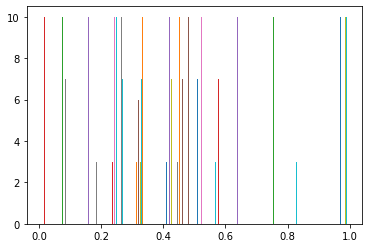

In [71]:
# data is now scaled between 0 and 1
plt.hist(scaled_array);

In [207]:
pd.DataFrame(scaled_array)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.45,0.389809,0.55,0.0,0.40,0.370064,0.6,0.33758,0.35,0.823567,...,0.9,0.412102,0.05,0.096815,0.95,0.474522,0.00,0.122293,1.0,1.0
1,0.45,0.389809,0.55,0.0,0.40,0.370064,0.6,0.33758,0.35,0.823567,...,0.9,0.412102,0.05,0.096815,0.95,0.474522,0.00,0.122293,1.0,1.0
2,0.45,0.389809,0.55,0.0,0.40,0.349682,0.6,0.33758,0.35,0.823567,...,0.9,0.412102,0.05,0.096815,0.95,0.474522,0.00,0.122293,1.0,1.0
3,0.50,0.014650,0.55,0.0,0.45,0.389809,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
4,0.50,0.014650,0.55,0.0,0.45,0.389809,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
5,0.50,0.014650,0.55,0.0,0.45,0.408917,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
6,0.50,0.043312,0.55,0.0,0.45,0.408917,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
7,0.50,0.043312,0.55,0.0,0.45,0.408917,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
8,0.50,0.065605,0.55,0.0,0.45,0.408917,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0
9,0.50,0.065605,0.55,0.0,0.45,0.320382,0.6,0.33758,0.40,0.349682,...,0.9,0.412102,0.10,0.566242,0.95,0.474522,0.05,0.096815,1.0,1.0


### Quote Imbalance for best bid and best ask

In [106]:
# (bs - as) / (as + bs)
# positive if bid_size_quote > ask_side_quote
# negative if bid_size_quote < ask_side_quote
# automatically scaled between [-1,1]

In [107]:
# bid side quote
bid_side_quote = array[:,1]
bid_side_quote

array([629., 629., 629.,  40.,  40.,  40.,  85.,  85., 120., 120.])

In [108]:
ask_side_quote = array[:,3]
ask_side_quote

array([17., 17., 17., 17., 17., 17., 17., 17., 17., 17.])

In [109]:
quote_imbalance = (bid_side_quote-ask_side_quote)/(bid_side_quote+ask_side_quote)
quote_imbalance

array([0.94736842, 0.94736842, 0.94736842, 0.40350877, 0.40350877,
       0.40350877, 0.66666667, 0.66666667, 0.75182482, 0.75182482])

In [110]:
# TODO: Should I scale it between 0 and 1?

In [111]:
max_value=1
min_value=-1
quote_imbalance_scaled = (quote_imbalance - min_value) / (max_value-min_value)
quote_imbalance_scaled

array([0.97368421, 0.97368421, 0.97368421, 0.70175439, 0.70175439,
       0.70175439, 0.83333333, 0.83333333, 0.87591241, 0.87591241])

### Quote Imbalance for all levels

In [194]:
bid_quantities = array[:,1::4]
ask_quantities = array[:,3::4]

In [200]:
quote_imbalance_all_levels = (bid_quantities - ask_quantities) / (bid_quantities + ask_quantities)
quote_imbalance_all_levels

array([[ 0.94736842,  0.04454148,  0.40032068, -0.09580838,  0.20247569,
         0.19101124,  0.16502463,  0.15414013, -0.63694952, -0.76726058],
       [ 0.94736842,  0.04454148,  0.40032068, -0.09580838,  0.20247569,
         0.19101124,  0.16502463,  0.15414013, -0.63694952, -0.76726058],
       [ 0.94736842,  0.01707098,  0.40032068, -0.09580838,  0.20247569,
         0.19101124,  0.16502463,  0.15414013, -0.63694952, -0.76726058],
       [ 0.40350877,  0.06972789,  0.00443656,  0.40935987,  0.00221239,
         0.1147541 ,  0.4021164 , -0.16798593,  0.08633094, -0.80751708],
       [ 0.40350877,  0.06972789,  0.00443656,  0.40935987,  0.00221239,
         0.1147541 ,  0.4021164 , -0.16798593,  0.08633094, -0.80751708],
       [ 0.40350877,  0.09286899,  0.00443656,  0.40935987,  0.00221239,
         0.1147541 ,  0.4021164 , -0.16798593,  0.08633094, -0.80751708],
       [ 0.66666667,  0.09286899,  0.00443656,  0.40935987,  0.00221239,
         0.1147541 ,  0.4021164 , -0.16798593

In [197]:
# One possibility would be to apply weights:
weights = np.linspace(1, 0, 10)
weights

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [199]:
new_weights = np.tile(weights,(10,1))
new_weights

array([[1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.7777777

In [201]:
new_weights*quote_imbalance_all_levels

array([[ 0.94736842,  0.03959243,  0.31136053, -0.06387226,  0.11248649,
         0.08489388,  0.05500821,  0.03425336, -0.07077217, -0.        ],
       [ 0.94736842,  0.03959243,  0.31136053, -0.06387226,  0.11248649,
         0.08489388,  0.05500821,  0.03425336, -0.07077217, -0.        ],
       [ 0.94736842,  0.0151742 ,  0.31136053, -0.06387226,  0.11248649,
         0.08489388,  0.05500821,  0.03425336, -0.07077217, -0.        ],
       [ 0.40350877,  0.06198035,  0.00345066,  0.27290658,  0.00122911,
         0.05100182,  0.1340388 , -0.03733021,  0.00959233, -0.        ],
       [ 0.40350877,  0.06198035,  0.00345066,  0.27290658,  0.00122911,
         0.05100182,  0.1340388 , -0.03733021,  0.00959233, -0.        ],
       [ 0.40350877,  0.08255021,  0.00345066,  0.27290658,  0.00122911,
         0.05100182,  0.1340388 , -0.03733021,  0.00959233, -0.        ],
       [ 0.66666667,  0.08255021,  0.00345066,  0.27290658,  0.00122911,
         0.05100182,  0.1340388 , -0.03733021

In [205]:
# sum row wise
np.sum(new_weights*quote_imbalance_all_levels, axis=1)

array([1.45031891, 1.45031891, 1.42590068, 0.9003782 , 0.9003782 ,
       0.92094807, 1.18410596, 1.18410596, 1.26926411, 1.16422093])

### Orderbook Imbalance

In [116]:
# all quantities
array[:,1::2]

array([[ 629.,   17.,  598.,  547., 1310.,  561.,  453.,  549.,  680.,
         451.,  795.,  540.,  473.,  339.,  906.,  664.,  169.,  762.,
         209., 1587.],
       [ 629.,   17.,  598.,  547., 1310.,  561.,  453.,  549.,  680.,
         451.,  795.,  540.,  473.,  339.,  906.,  664.,  169.,  762.,
         209., 1587.],
       [ 629.,   17.,  566.,  547., 1310.,  561.,  453.,  549.,  680.,
         451.,  795.,  540.,  473.,  339.,  906.,  664.,  169.,  762.,
         209., 1587.],
       [  40.,   17.,  629.,  547.,  566.,  561., 1310.,  549.,  453.,
         451.,  680.,  540.,  795.,  339.,  473.,  664.,  906.,  762.,
         169., 1587.],
       [  40.,   17.,  629.,  547.,  566.,  561., 1310.,  549.,  453.,
         451.,  680.,  540.,  795.,  339.,  473.,  664.,  906.,  762.,
         169., 1587.],
       [  40.,   17.,  659.,  547.,  566.,  561., 1310.,  549.,  453.,
         451.,  680.,  540.,  795.,  339.,  473.,  664.,  906.,  762.,
         169., 1587.],
       [  

In [132]:
# all bid quantities
bid_quantities = array[:,1::4]
bid_quantities

array([[ 629.,  598., 1310.,  453.,  680.,  795.,  473.,  906.,  169.,
         209.],
       [ 629.,  598., 1310.,  453.,  680.,  795.,  473.,  906.,  169.,
         209.],
       [ 629.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,  169.,
         209.],
       [  40.,  629.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [  40.,  629.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [  40.,  659.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [  85.,  659.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [  85.,  659.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [ 120.,  659.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.],
       [ 120.,  520.,  566., 1310.,  453.,  680.,  795.,  473.,  906.,
         169.]])

In [133]:
# all ask quantities
ask_quantities = array[:,3::4]
ask_quantities

array([[  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.],
       [  17.,  547.,  561.,  549.,  451.,  540.,  339.,  664.,  762.,
        1587.]])

In [140]:
sum([612.,    51.,   749.,   -96.,   229.,   255.,   134.,   242., -593., -1378.])

205.0

In [137]:
# difference:
bid_quantities - ask_quantities

array([[  612.,    51.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [  612.,    51.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [  612.,    19.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [   23.,    82.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   23.,    82.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   23.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   68.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   68.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [  103.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [  103.,   -27.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.]])

In [144]:
# sum the differences row-vise
np.sum(bid_quantities - ask_quantities, axis=1)

array([205., 205., 173.,   4.,   4.,  34.,  79.,  79., 114., -25.])

In [145]:
# devide by the number of levels:
k = 10
(1/10)*np.sum(bid_quantities - ask_quantities, axis=1)

array([20.5, 20.5, 17.3,  0.4,  0.4,  3.4,  7.9,  7.9, 11.4, -2.5])

In [155]:
np.arange(start=1, stop=0, step=0.1)

array([], dtype=float64)

In [187]:
# create weigths (more aggressive levels are weighted stronger)
weights = np.linspace(1, 0, 10)
weights

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [188]:
# make a weights array of 10x10
new_weights = np.tile(weights,(10,1))
new_weights

array([[1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
        0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ],
       [1.        , 0.88888889, 0.7777777

In [186]:
(bid_quantities - ask_quantities)

array([[  612.,    51.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [  612.,    51.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [  612.,    19.,   749.,   -96.,   229.,   255.,   134.,   242.,
         -593., -1378.],
       [   23.,    82.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   23.,    82.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   23.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   68.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [   68.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [  103.,   112.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.],
       [  103.,   -27.,     5.,   761.,     2.,   140.,   456.,  -191.,
          144., -1418.]])

In [191]:
# multiply the differences with the weights (first should be same, last should be 0)
weighted_differences = new_weights*(bid_quantities - ask_quantities)
weighted_differences

array([[612.        ,  45.33333333, 582.55555556, -64.        ,
        127.22222222, 113.33333333,  44.66666667,  53.77777778,
        -65.88888889,  -0.        ],
       [612.        ,  45.33333333, 582.55555556, -64.        ,
        127.22222222, 113.33333333,  44.66666667,  53.77777778,
        -65.88888889,  -0.        ],
       [612.        ,  16.88888889, 582.55555556, -64.        ,
        127.22222222, 113.33333333,  44.66666667,  53.77777778,
        -65.88888889,  -0.        ],
       [ 23.        ,  72.88888889,   3.88888889, 507.33333333,
          1.11111111,  62.22222222, 152.        , -42.44444444,
         16.        ,  -0.        ],
       [ 23.        ,  72.88888889,   3.88888889, 507.33333333,
          1.11111111,  62.22222222, 152.        , -42.44444444,
         16.        ,  -0.        ],
       [ 23.        ,  99.55555556,   3.88888889, 507.33333333,
          1.11111111,  62.22222222, 152.        , -42.44444444,
         16.        ,  -0.        ],
       [ 6

In [192]:
k = 10
(1/k)*np.sum(weighted_differences, axis=1)

array([144.9       , 144.9       , 142.05555556,  79.6       ,
        79.6       ,  82.26666667,  86.76666667,  86.76666667,
        90.26666667,  77.91111111])

In [193]:
# Problem: has to be scaled as well...